In [ ]:
pip install imbalanced-learnLast edited on October 16


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/enhanced_health_data.csv')

# Display the first few rows of the dataset
df.head()

,Name,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI,Smoker,Diabetes,Health
0,Heidi Williamson,Male,35,129,83,188,169.072096,73.796178,25.816062,False,True,Fair
1,Eric Odom,Male,70,133,95,224,154.188610,70.671522,29.726232,False,False,Fair
2,Kelly Thomas,Male,79,149,88,179,197.514897,97.590268,25.015362,True,True,Bad
3,Ann Lara,Female,52,115,76,204,157.223771,82.202776,33.254473,False,False,Fair
4,Tammy Oliver,Male,51,135,82,201,177.370258,57.038726,18.130435,False,False,Fair


In [ ]:
# Display basic statistics for the dataset
df.describe()

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.834000,129.526000,82.879000,187.715000,175.038446,74.941397,24.919168
std,17.980816,9.532061,6.064911,21.091387,14.395461,14.622998,6.290984
min,18.000000,105.000000,65.000000,140.000000,150.087644,50.011915,13.094723
25%,33.000000,123.000000,80.000000,172.000000,162.805812,62.264152,20.162104
50%,49.000000,130.000000,83.000000,187.000000,175.426060,74.808034,24.164326
75%,64.000000,136.000000,87.000000,203.000000,187.827352,87.518363,28.671465
max,80.000000,150.000000,95.000000,239.000000,199.966307,99.954932,43.806649


<ipython-input-51-38ea4415ea30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_counts.index, y=health_counts.values, palette='viridis')


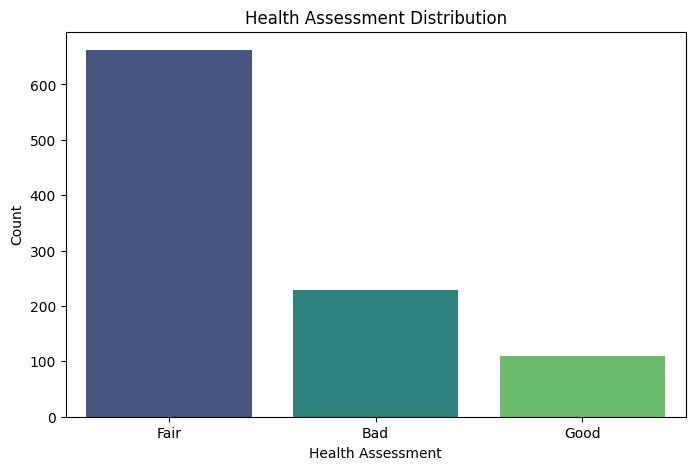

In [ ]:
# Count the number of individuals in each health assessment category
health_counts = df['Health'].value_counts()

# Create a bar plot for health assessment counts
plt.figure(figsize=(8, 5))
sns.barplot(x=health_counts.index, y=health_counts.values, palette='viridis')
plt.title('Health Assessment Distribution')
plt.xlabel('Health Assessment')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoker'] = df['Smoker'].astype(int)
df['Diabetes'] = df['Diabetes'].astype(int)
df['Health'] = df['Health'].map({'Good': 0, 'Fair': 1, 'Bad': 2})

In [ ]:
# Split the data into features and target
X = df.drop(columns=['Name', 'Health'])
y = df['Health']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.96      0.99      0.98       137
           2       1.00      0.98      0.99        46

    accuracy                           0.97       200
   macro avg       0.96      0.91      0.94       200
weighted avg       0.97      0.97      0.97       200



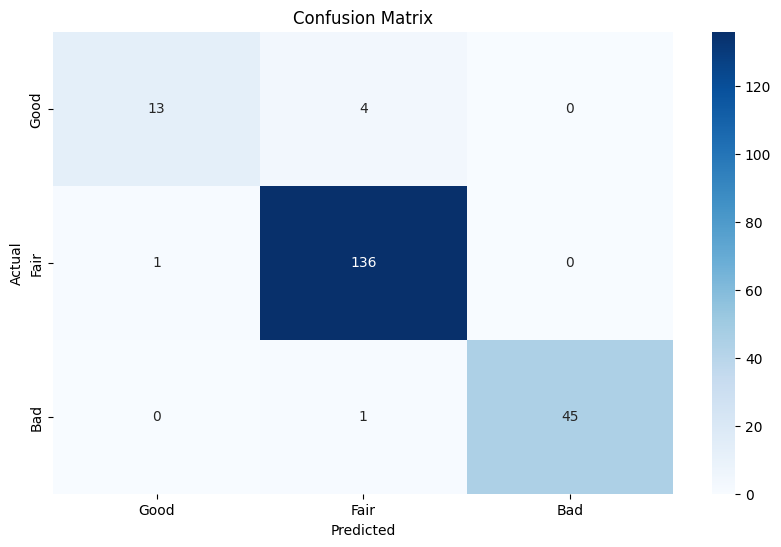

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Fair', 'Bad'], yticklabels=['Good', 'Fair', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

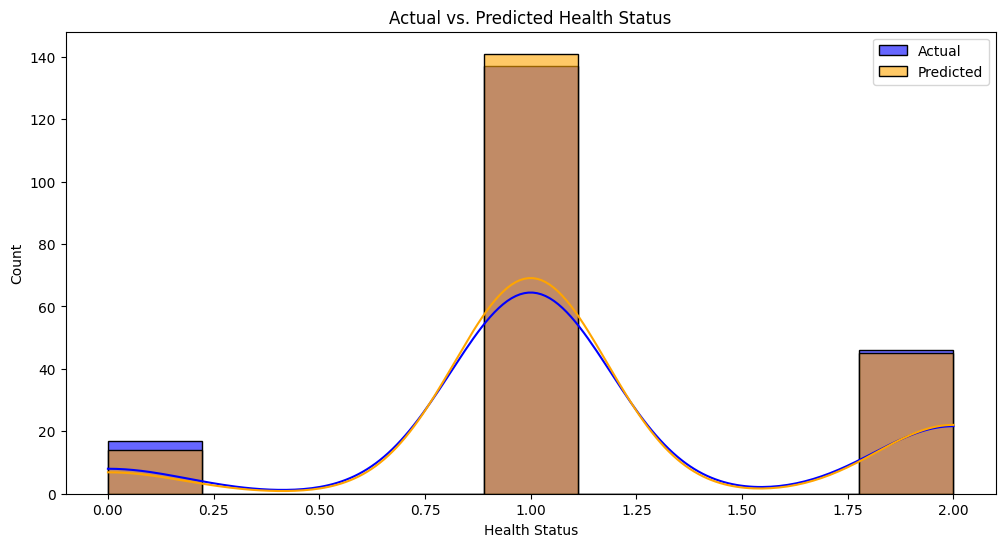

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, alpha=0.6)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True, alpha=0.6)
plt.title('Actual vs. Predicted Health Status')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.legend()
plt.show()

ADDITIONAL EXPERIMENT


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training data (only to the training set)
rm = RandomOverSampler(random_state=42)
X_train_rm, y_train_rm = rm.fit_resample(X_train, y_train)


In [ ]:
original_class_distribution = y_train.value_counts()
oversampled_class_distribution = y_train_rm.value_counts()

<Figure size 1200x600 with 0 Axes>

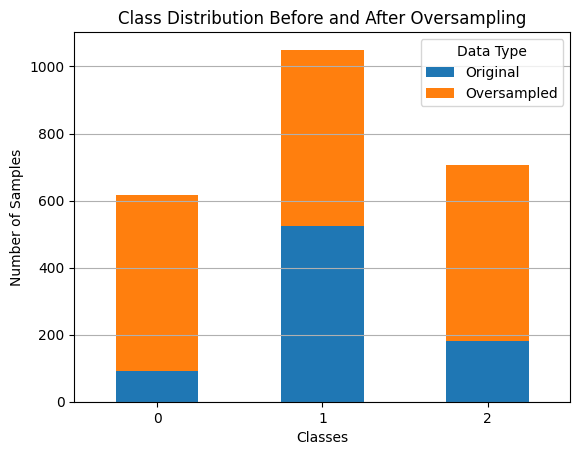

In [ ]:

# Create a DataFrame for visualization
class_distribution_df = pd.DataFrame({
    'Original': original_class_distribution,
    'Oversampled': oversampled_class_distribution
}).fillna(0)  # Fill NaN values with 0

# Plotting
plt.figure(figsize=(12, 6))
class_distribution_df.plot(kind='bar', stacked=True)
plt.title('Class Distribution Before and After Oversampling')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Data Type', labels=['Original', 'Oversampled'])
plt.grid(axis='y')
plt.show()

In [ ]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_rm, y_train_rm)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.97      0.99      0.98       137
           2       1.00      0.96      0.98        46

    accuracy                           0.97       200
   macro avg       0.97      0.94      0.96       200
weighted avg       0.98      0.97      0.97       200



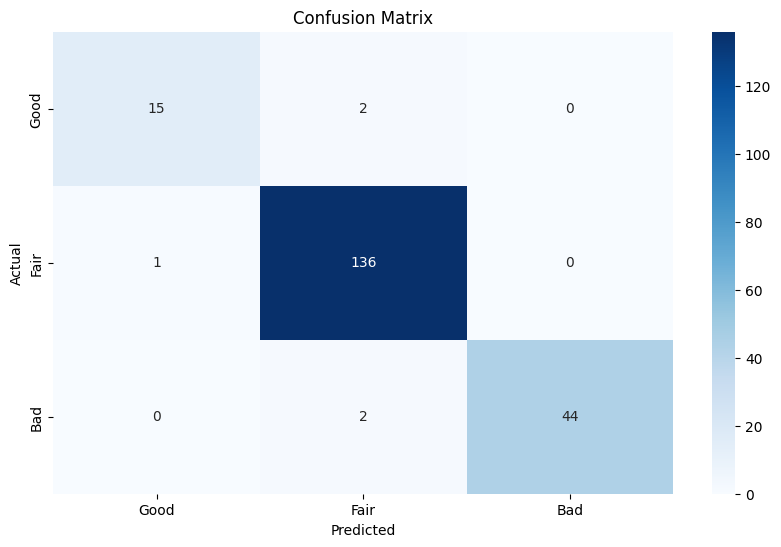

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Fair', 'Bad'], yticklabels=['Good', 'Fair', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

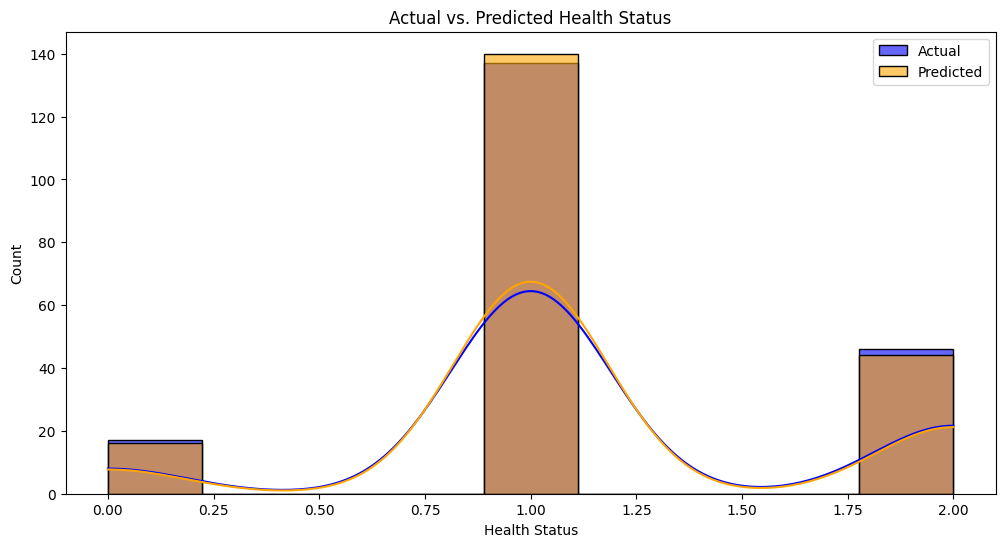

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, alpha=0.6)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True, alpha=0.6)
plt.title('Actual vs. Predicted Health Status')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.legend()
plt.show()